In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import gensim
from gensim import corpora
!pip install pyLDAvis
import pyLDAvis.gensim_models

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 4.8 MB/s eta 0:00:00


In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
import pandas as pd

# Manually create a small sample dataset
data = {
    'Text': [
        "This product exceeded my expectations. Highly recommend!",
        "Terrible quality, broke after one use.",
        "Decent for the price, nothing special.",
        "Absolutely love it! Will buy again.",
        "Not what I expected. Very disappointing."
    ],
    'Score': [5, 1, 3, 5, 2]
}

# Create DataFrame
df = pd.DataFrame(data)

print(df)



                                                Text  Score
0  This product exceeded my expectations. Highly ...      5
1             Terrible quality, broke after one use.      1
2             Decent for the price, nothing special.      3
3                Absolutely love it! Will buy again.      5
4           Not what I expected. Very disappointing.      2


In [18]:
def sentiment_label(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Score'].apply(sentiment_label)
df = df[df['sentiment'] != 'neutral']  # Remove neutral for cleaner classification
df = df[['Text', 'sentiment']]
df = df.dropna().reset_index(drop=True)
print(df['sentiment'].value_counts())

sentiment
positive    2
negative    2
Name: count, dtype: int64


In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['Text'].apply(clean_text)

In [22]:
X = df['clean_text']
y = df['sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [24]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\m

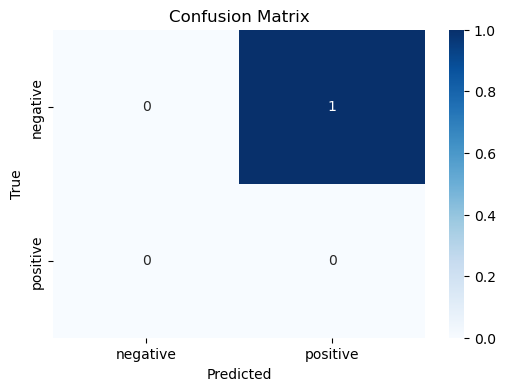

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
tokenized_docs = [doc.split() for doc in df['clean_text']]

In [30]:
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [32]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=5,
                                   random_state=42,
                                   passes=10,
                                   alpha='auto')

In [34]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.150*"quality" + 0.150*"one" + 0.150*"broke" + 0.150*"terrible" + 0.150*"use" + 0.025*"disappointing" + 0.025*"love" + 0.025*"expected" + 0.025*"buy" + 0.025*"absolutely"
Topic 2: 0.067*"use" + 0.067*"expected" + 0.067*"disappointing" + 0.067*"broke" + 0.067*"terrible" + 0.067*"absolutely" + 0.067*"love" + 0.067*"one" + 0.067*"buy" + 0.067*"quality"
Topic 3: 0.109*"recommend" + 0.109*"product" + 0.109*"exceeded" + 0.109*"expectation" + 0.109*"highly" + 0.109*"buy" + 0.109*"absolutely" + 0.109*"love" + 0.018*"expected" + 0.018*"disappointing"
Topic 4: 0.067*"disappointing" + 0.067*"expected" + 0.067*"absolutely" + 0.067*"love" + 0.067*"use" + 0.067*"buy" + 0.067*"exceeded" + 0.067*"expectation" + 0.067*"highly" + 0.067*"quality"
Topic 5: 0.240*"expected" + 0.240*"disappointing" + 0.040*"use" + 0.040*"love" + 0.040*"absolutely" + 0.040*"buy" + 0.040*"highly" + 0.040*"expectation" + 0.040*"terrible" + 0.040*"product"


In [38]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

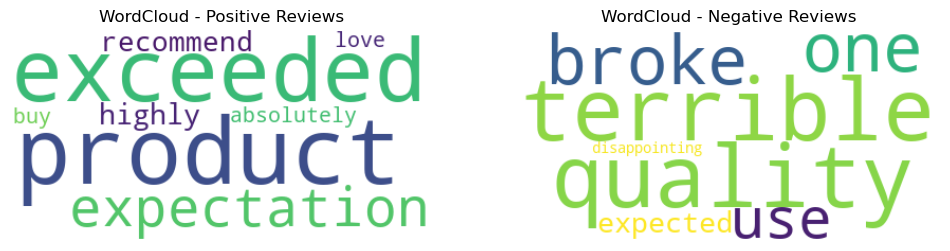

In [40]:
pos_text = ' '.join(df[df['sentiment'] == 'positive']['clean_text'])
neg_text = ' '.join(df[df['sentiment'] == 'negative']['clean_text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wc_pos = WordCloud(background_color='white', max_words=100).generate(pos_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive Reviews')

plt.subplot(1,2,2)
wc_neg = WordCloud(background_color='white', max_words=100).generate(neg_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negative Reviews')

plt.show()